## Import Statements

In [28]:
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score  
import numpy as np
import pandas as pd
import numpy.random as r
import matplotlib.pyplot as plt

## Loading the in Data

In [29]:
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel('sample.xlsx', sheet_name='Sheet1')
df = df.dropna()
df

,AGE_YRS,SEX,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,ALLERGIES,VAX_MANU,VAX_DOSE_SERIES,NUM_SYMPTOMS
0,47.0,1,3.0,1,0,1,0,1,1,5
2,30.0,1,0.0,0,0,0,0,1,2,5
3,55.0,2,3.0,0,0,0,1,0,1,1
4,32.0,2,0.0,1,0,1,1,0,1,3
5,28.0,2,0.0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
995,32.0,1,0.0,1,0,0,1,1,2,3
996,16.0,1,1.0,0,0,0,0,1,1,1
997,43.0,2,0.0,1,0,1,0,1,1,2
998,34.0,2,0.0,0,0,0,0,1,2,2


## Setting Up our Training and Validation Sets

In [30]:
trainSet = df[:530]
validSet = df[530:]

XTrain = trainSet[['AGE_YRS', 'NUMDAYS','SEX','OTHER_MEDS','CUR_ILL','HISTORY','ALLERGIES','VAX_MANU', 'VAX_DOSE_SERIES']].to_numpy()
yTrain = trainSet['NUM_SYMPTOMS'].to_numpy()

XValid = validSet[['AGE_YRS', 'NUMDAYS', 'SEX','OTHER_MEDS','CUR_ILL','HISTORY','ALLERGIES','VAX_MANU', 'VAX_DOSE_SERIES']].to_numpy()
yValid = validSet['NUM_SYMPTOMS'].to_numpy()

print(f'Training Set:\n{trainSet}')
print(f'X Training Set:\n{XTrain}')
print(f'y Training Set:\n{yTrain}')

print(f'Training Set:\n{validSet}')
print(f'X Training Set:\n{XValid}')
print(f'y Training Set:\n{yValid}')

Training Set:
     AGE_YRS  SEX  NUMDAYS  OTHER_MEDS  CUR_ILL  HISTORY  ALLERGIES  VAX_MANU  \
0       47.0    1      3.0           1        0        1          0         1   
2       30.0    1      0.0           0        0        0          0         1   
3       55.0    2      3.0           0        0        0          1         0   
4       32.0    2      0.0           1        0        1          1         0   
5       28.0    2      0.0           0        0        0          1         0   
..       ...  ...      ...         ...      ...      ...        ...       ...   
591     41.0    2      0.0           1        0        1          1         0   
592     35.0    2      0.0           0        0        0          0         1   
593     30.0    2      6.0           1        0        0          1         0   
596     50.0    1      1.0           0        0        0          0         0   
597     33.0    2      0.0           0        0        0          0         0   

     VAX_DOSE

## Scaling the Data

In [31]:
# used algorithim from HW4

scale = StandardScaler()

X = df[['AGE_YRS', 'NUMDAYS','SEX','OTHER_MEDS','CUR_ILL','HISTORY','ALLERGIES','VAX_MANU', 'VAX_DOSE_SERIES']].to_numpy()
y = df['NUM_SYMPTOMS'].to_numpy()
X = scale.fit_transform(X)
X

array([[-0.16888334, -0.05597658, -1.72454186, ..., -1.40469013,
         1.08239024, -0.63045725],
       [-1.08586996, -0.19135943, -1.72454186, ..., -1.40469013,
         1.08239024,  1.58615038],
       [ 0.26263977, -0.05597658,  0.55938054, ...,  0.71190078,
        -0.92388121, -0.63045725],
       ...,
       [-0.3846449 , -0.19135943,  0.55938054, ..., -1.40469013,
         1.08239024, -0.63045725],
       [-0.8701084 , -0.19135943,  0.55938054, ..., -1.40469013,
         1.08239024,  1.58615038],
       [-0.97798918, -0.19135943,  0.55938054, ..., -1.40469013,
         1.08239024,  1.58615038]])

## Making the Training and Validation Sets

In [34]:
# used algorithim from HW4
XTrain, XTest, yTrain, yTest = train_test_split(X,y, test_size=.4)

In [36]:
print(f'X TRAIN:\n{XTrain}')
print(f'Y TRAIN:\n{yTrain}')

print(f'X TEST:\n{XTest}')
print(f'Y TEST:\n{yTest}')

X TRAIN:
[[-1.13981035 -0.14623181 -1.72454186 ...  0.71190078  1.08239024
   1.58615038]
 [-0.81616801 -0.19135943 -1.72454186 ...  0.71190078 -0.92388121
  -0.63045725]
 [-1.08586996  0.30504434  0.55938054 ...  0.71190078  1.08239024
  -0.63045725]
 ...
 [ 2.09661301  0.66606527 -1.72454186 ... -1.40469013  1.08239024
   1.58615038]
 [ 1.23356678 -0.19135943  0.55938054 ... -1.40469013  1.08239024
  -0.63045725]
 [ 2.15055339 -0.19135943 -1.72454186 ...  0.71190078 -0.92388121
   1.58615038]]
Y TRAIN:
[5 1 4 5 5 1 5 3 1 1 5 3 5 2 5 1 1 5 2 5 4 2 3 1 3 5 4 2 4 5 1 5 2 1 2 2 3
 5 4 5 1 5 1 4 2 4 1 2 1 5 5 3 5 5 3 5 5 5 5 4 1 2 5 2 4 2 2 4 3 1 5 3 2 3
 5 5 2 3 1 5 4 2 2 1 2 5 5 2 3 4 2 1 4 2 5 5 2 5 5 3 5 3 5 5 5 5 1 5 2 5 5
 4 5 3 5 5 1 4 5 5 5 4 3 2 4 5 2 5 1 3 5 5 1 3 2 5 4 5 2 1 3 5 2 5 5 5 5 1
 4 5 4 4 4 2 5 5 1 5 1 1 1 1 4 5 3 3 5 1 1 5 3 5 5 5 5 5 5 2 2 2 2 5 3 5 2
 3 5 3 3 5 5 5 4 5 5 5 5 5 5 1 5 1 3 3 1 2 5 5 1 5 4 1 5 5 5 2 5 5 3 5 2 5
 1 2 5 5 3 2 5 5 2 2 5 3 5 5 5 1 5 5 1 1

## Creating the Output layer

In [47]:
# used algorithim from HW4
def output(y):
    yVect = np.zeros((len(y), 6))
    for i in range(len(y)):
        yVect[i, y[i]] = 1
    return yVect

In [50]:
yVecTrain = output(yTrain)
yVecTest = output(yTest)

print(f'Y TRAIN:\n{yVecTrain}')
print(f'Y TEST:\n{yVecTest}')

Y TRAIN:
[[0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
Y TEST:
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


## Creating the Neural Network

In [89]:
# Sigmoid function
def f(z):
    return 1 / (1 + np.exp(-z))

def f_deriv(z):
    return f(z) * (1 - f(z))

def tanh(z):
    return (np.exp(z) - np.exp(-1.0*z)) / (np.exp(z) + np.exp(-1.0*z))

def tanh_deriv(z):
    return 1 - np.square(tanh(z))

### Setting up the initial values for W, b, $\triangledown W$ and $\triangledown b$

In [90]:
# used algorithim from HW4
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

### Feed Forward 

In [91]:
def sigmoid_feed_forward(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

def feed_forward_tanh(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = tanh(z[l+1])
    return a, z

## Computing $\delta$

In [92]:
def sigmoid_calculate_out_layer_delta(y, a_out, z_out):
    return -(y-a_out) * f_deriv(z_out) 

def sigmoid_calculate_hidden_delta(delta_plus_1, w_l, z_l):
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

def calculate_out_layer_tanh(y, a_out, z_out):
    return -(y-a_out) * tanh_deriv(z_out)

def calculate_hidden_tanh(delta_plus_1, w_l, z_l):
    return np.dot(np.transpose(w_l), delta_plus_1) * tanh_deriv(z_l)

## The Back Propagation Algorithm

In [93]:
# used algorithim from HW4

def sigmoid_train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = sigmoid_feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    # np.newaxis increase the number of dimensions
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

def sigmoid_reg_train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25, lamb=0.05):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = sigmoid_feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    # np.newaxis increase the number of dimensions
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l]) + lamb*W[l]
            b[l] += -alpha * (1.0/N * tri_b[l]) + lamb*b[l]
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

def sigmoid_predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = sigmoid_feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

def train_tanh(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Tanh-Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward_tanh(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_tanh(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_tanh(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_tanh(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward_tanh(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

## Running the Network-Sigmoid

In [97]:
# our iniital stage is going to have 9 neurons, one for each vector
# 50 hidden neurons
# and 6 neurons in the output to say how many symptoms a person would have
nn_structure = [9, 30, 6]

W, b, avg_cost_func = sigmoid_train_nn(nn_structure, XTrain, yVecTrain, 4000)

Starting gradient descent for 4000 iterations
Iteration 0 of 4000
Iteration 1000 of 4000
Iteration 2000 of 4000
Iteration 3000 of 4000


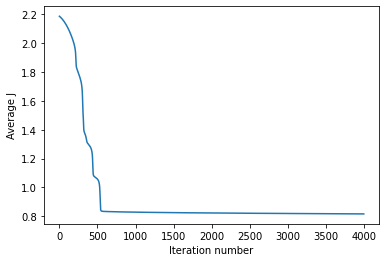

In [98]:
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [99]:
yPred = sigmoid_predict_y(W, b, XTest, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(yTest, yPred) * 100))

Prediction accuracy is 43.38028169014084%


## Running the Network-Sigmoid Regularization

In [100]:
W_reg, b_reg, avg_cost_func_reg = sigmoid_reg_train_nn(nn_structure, XTrain, yVecTrain, 4000)

Starting gradient descent for 4000 iterations
Iteration 0 of 4000
<ipython-input-89-c54e369179af>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
Iteration 1000 of 4000
Iteration 2000 of 4000
Iteration 3000 of 4000


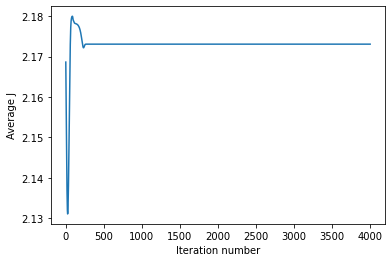

In [101]:
plt.plot(avg_cost_func_reg)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [102]:
yPred_reg = sigmoid_predict_y(W_reg, b_reg, XTest, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(yTest, yPred_reg) * 100))

Prediction accuracy is 0.0%
<ipython-input-89-c54e369179af>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


## Running the Network-Tanh

In [103]:
W_tanh, b_tanh, avg_cost_func = train_tanh(nn_structure, XTrain, yVecTrain, 4000)

Tanh-Starting gradient descent for 4000 iterations
Iteration 0 of 4000
Iteration 1000 of 4000
Iteration 2000 of 4000
Iteration 3000 of 4000


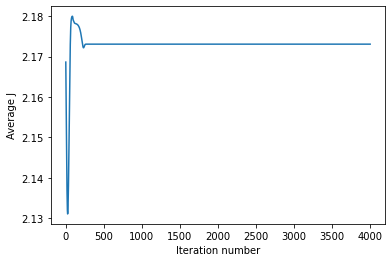

In [104]:
plt.plot(avg_cost_func_reg)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [105]:
y_pred_tanh = predict_tanh(W_tanh, b_tanh, XTest, 3)
print('Tanh: Prediction accuracy is {}%'.format(accuracy_score(yTest, y_pred_tanh) * 100))

Tanh: Prediction accuracy is 36.901408450704224%
